In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2 as cv

<function matplotlib.pyplot.show(close=None, block=None)>

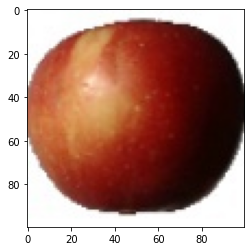

In [3]:
img = cv.imread('Fruit-Images-Dataset-master/Test/Apple Braeburn/3_100.jpg')
# cv.imshow('test', img)
img =cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show

In [4]:
from skimage import filters

<function matplotlib.pyplot.show(close=None, block=None)>

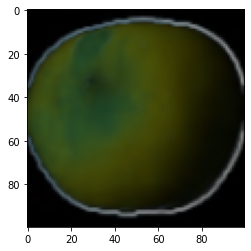

In [5]:
plt.imshow(filters.sobel(img))
plt.show

this is a spectral imaging library

<function matplotlib.pyplot.show(close=None, block=None)>

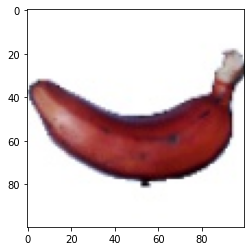

In [39]:
img = cv.imread('Fruit-Images-Dataset-master/Test/Banana Red/5_100.jpg')
img =cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show

In [7]:
import os

In [8]:
data_path = fr'Fruit-Images-Dataset-master/Test'
test = os.listdir(data_path)

In [9]:
apple = test[0]
apple

'Apple Braeburn'

In [6]:
from skimage.io import imread

In [10]:
i =  os.listdir('Fruit-Images-Dataset-master/Test/'+apple)
len(i)

164

In [11]:
img1 = os.listdir('Fruit-Images-Dataset-master/Test/'+apple)
img1[0]

'321_100.jpg'

In [12]:
data = []
name = []

In [13]:
for i in img1:
    x = imread('Fruit-Images-Dataset-master\\Test\\Apple Braeburn\\'+i)
    data.append(x)
    name.append('Apple')

<function matplotlib.pyplot.show(close=None, block=None)>

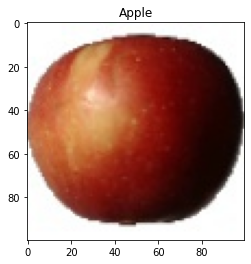

In [14]:
plt.title(name[0])
plt.imshow(data[0])
plt.show

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
(x_train, x_test, y_train, y_test )= train_test_split(np.array(data), np.array(name), test_size=0.2)

<function matplotlib.pyplot.show(close=None, block=None)>

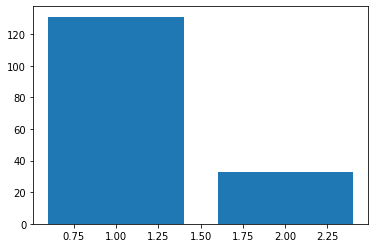

In [17]:
plt.bar([1,2], [len(x_train) ,len(x_test)])
plt.show


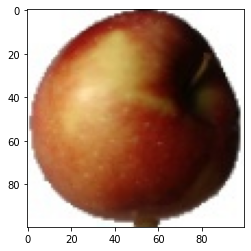

In [18]:
plt.imshow(x_train[0])
plt.show()

In [19]:
from skimage.feature import hog 

In [20]:
# imread(img1[0])
x = imread('Fruit-Images-Dataset-master\\Test\\Apple Braeburn\\3_100.jpg', as_gray=True)

In [21]:
apple_hog, apple_hog_img = hog(
    x, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')

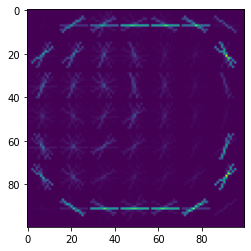

In [22]:
plt.imshow(apple_hog_img)
plt.show()

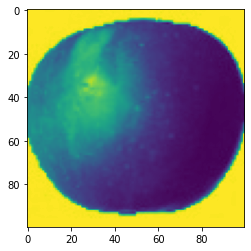

In [23]:
plt.imshow(x)
plt.show()

In [24]:
from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image

In [25]:
print(x_train.shape, y_train.shape)

(131, 100, 100, 3) (131,)


In [20]:
img = cv.imread('Fruit-Images-Dataset-master/Test/Apple Braeburn/3_100.jpg')

NameError: name 'cv' is not defined

In [26]:
img = x.astype(int)
mask = img.astype(bool)
graph = image.img_to_graph(img, mask=mask)
beta = 10
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps
labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

C:\Users\aaris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

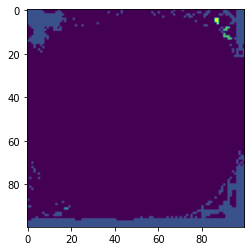

In [27]:
plt.imshow(label_im)
plt.show

In [ ]:
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)



In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [29]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [30]:
models = []
models.append(('LR', LogisticRegression(random_state=9)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=9)))
models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=9)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=9)))

In [31]:
results = []
names   = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

C:\Users\aaris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aaris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "C:\Users\aaris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklear

In [32]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [33]:
sg = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)

In [34]:
scalify = StandardScaler()
X_train_prepared = scalify.fit_transform(apple_hog_img)

In [35]:
print(X_train_prepared.shape)

(100, 100)


In [36]:
sg.fit(X_train_prepared, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [100, 131]

now spectral imaging

In [7]:
img.shape

(100, 100, 3)

In [8]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [9]:
# img.shape
img = img.reshape(-1)
img.shape

(30000,)

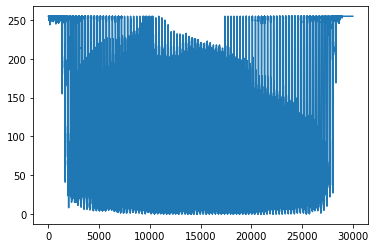

In [10]:
plt.plot(img)

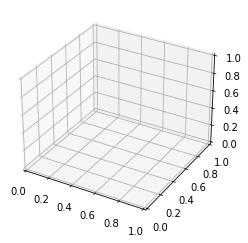

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [12]:
ax.plot3D(img[0], img[1], img[2], 'gray')